# Task 31

### Importing Libraries 

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectKBest, f_classif

### Load Dataset 

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

### Creating Dataframe

In [3]:

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

### PCA
Principal Component Analysis reduces the dataset to its two principal components with the greatest variance.

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_pca['target'] = y

### LDA
Linear Discriminant Analysis reduces the dataset to its two linear discriminants that best separate the classes.

In [5]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)
df_lda = pd.DataFrame(X_lda, columns=['LDA1', 'LDA2'])
df_lda['target'] = y


### t-SNE
t-Distributed Stochastic Neighbor Embedding is a non-linear technique used for visualizing high-dimensional data in two dimensions.

In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, columns=['t-SNE1', 't-SNE2'])
df_tsne['target'] = y

### Plotting 

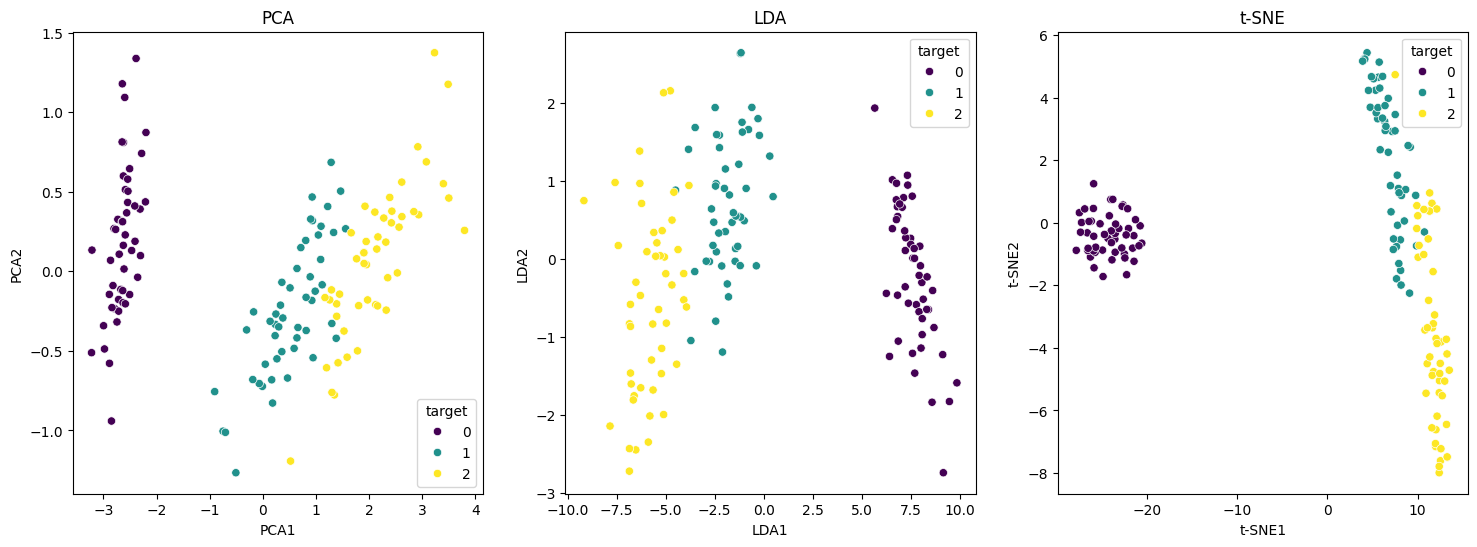

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(ax=axes[0], x='PCA1', y='PCA2', hue='target', data=df_pca, palette='viridis')
axes[0].set_title('PCA')

sns.scatterplot(ax=axes[1], x='LDA1', y='LDA2', hue='target', data=df_lda, palette='viridis')
axes[1].set_title('LDA')

sns.scatterplot(ax=axes[2], x='t-SNE1', y='t-SNE2', hue='target', data=df_tsne, palette='viridis')
axes[2].set_title('t-SNE')

plt.show()

### Feature selection using SelectKBest
SelectKBest selects the two features with the highest scores according to the ANOVA F-value.

In [8]:
selector = SelectKBest(f_classif, k=2)
X_kbest = selector.fit_transform(X, y)
df_kbest = pd.DataFrame(X_kbest, columns=['KBest1', 'KBest2'])
df_kbest['target'] = y

print("Selected Features (SelectKBest):\n", df_kbest.head())

Selected Features (SelectKBest):
    KBest1  KBest2  target
0     1.4     0.2       0
1     1.4     0.2       0
2     1.3     0.2       0
3     1.5     0.2       0
4     1.4     0.2       0
